In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

# trainに60000個の訓練用データ、testに10000個のテストデータが入る
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


<hr>
<hr>

# データ図示

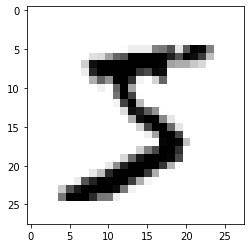

↑の目標値：5


In [5]:
#最初のデータだけ図示
x0 = x_train[0]

# ヒートマップにして表示
plt.figure()
plt.imshow(x0,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

#ちなみに認識結果（目標値）は
print('↑の目標値：{0}'.format(y_train[0]))

<hr>
<hr>

# データ変形

In [6]:
from keras.utils import np_utils

In [8]:
#行列の型を変換
x_train = x_train.reshape(60000,28*28)
#float型に変換
x_train = x_train.astype('float32')
#0~1の値に収める
x_train = x_train/255
#目標データも1-of-K符号化法で表す
y_train = np_utils.to_categorical(y_train,10)

In [10]:
#同じことをテストデータに対しても行う
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

<hr>
<hr>

# 学習

In [12]:
#ニューラルネットワークの定義
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はシグモイド関数
model.add(Dense(16,input_dim=784,activation='sigmoid'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [16]:
#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 1.9019 - accuracy: 0.5041 - val_loss: 2.6456 - val_accuracy: 0.3102
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.8733 - accuracy: 0.5124 - val_loss: 2.6794 - val_accuracy: 0.3193
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.8446 - accuracy: 0.5191 - val_loss: 2.7182 - val_accuracy: 0.3220
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.8157 - accuracy: 0.5418 - val_loss: 2.7588 - val_accuracy: 0.3266
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 1.7867 - accuracy: 0.5431 - val_loss: 2.7883 - val_accuracy: 0.3265
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 1.7576 - accuracy: 0.5584 - val_loss: 2.7797 - val_accuracy: 0.3307
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 1.7287 - accuracy: 0.5653 - val_loss: 2.8171 - val_accuracy: 0.3325
Epoch 8/10
60/60 [==

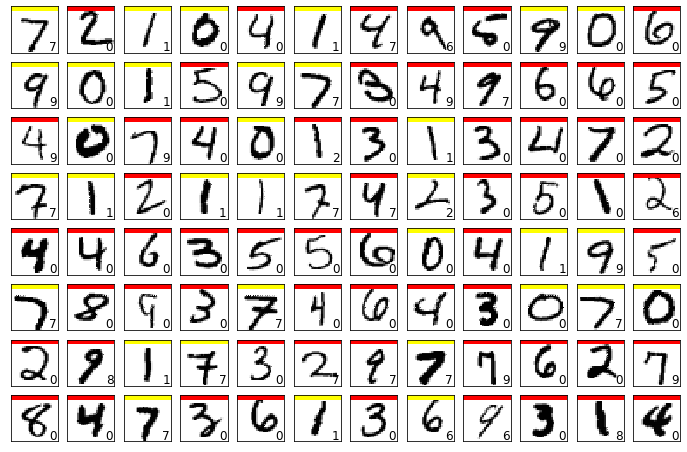

In [20]:
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()    

<hr>
<hr>

# ReLUで学習

In [21]:
#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はReLU関数
model.add(Dense(16,input_dim=784,activation='relu'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 2.2956 - accuracy: 0.1363 - val_loss: 1.5618 - val_accuracy: 0.5038
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 2.2756 - accuracy: 0.1826 - val_loss: 2.3290 - val_accuracy: 0.4946
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 2.2444 - accuracy: 0.2967 - val_loss: 3.7130 - val_accuracy: 0.4689
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 2.1987 - accuracy: 0.3730 - val_loss: 5.8192 - val_accuracy: 0.4643
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 2.1396 - accuracy: 0.4285 - val_loss: 8.6542 - val_accuracy: 0.4606
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 2.0697 - accuracy: 0.4641 - val_loss: 11.8835 - val_accuracy: 0.4627
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 1.9923 - accuracy: 0.4904 - val_loss: 15.2650 - val_accuracy: 0.4707
Epoch 8/10
60/60 [

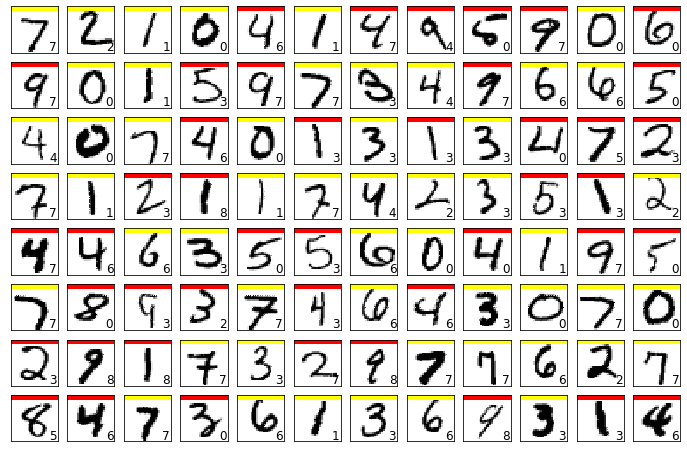

In [22]:
#再評価
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()  